# Introduction and Business Problem 

<h3>Introduction</h3>

Sri Lanka is a relatively small island directly south of India, with a population of more than 21 Million residents (as of 2018) of which around 5.6 Million populate the capital of Colombo. Colombo is also the biggest city within the island and serves as the financial capital and a tourist destination. As such Colombo serves as a hunting ground for up and coming businesses such as cafes and restaurants. It a can daunting for a person to search for the best place to eat/drink with the various options presented in this ever-growing city.
<h3>Business Problem </h3>

For this capstone I will be creating a guide utilizing the Foursquare API, to categorize cafes within Colombo, after which I will be clustering the cafes according the amount of likes they have received. My aim is to build a guide to traverse through the various coffee shops of Colombo and select the best ones.
Data
To solve this problem, I will be utilizing the following data, 
<ul>
	<li>A list of the inter-city limits of Colombo.</li>
	<li>The latitudes and longitudes of those areas for visualization.</li>
	<li>Venue Data utilizing the foursquare API.</li>
</ul>
<h3>Data gathering</h3>

To obtain the list of inter-city limits I will be extracting the content from the Wikipedia Page (https://en.wikipedia.org/wiki/Colombo) which contains the inter-city limits. I will be using web scraping techniques to extract the data with the help of python libraries such as beautiful soup and requests. The Latitudes and Longitudes of the Inter-city Limits will be obtained using pythons Geocoder package. After which I will be utilizing the Foursquare API to get venue Data of the relevant locations. 



<h3>1) Data Preparation </h3>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


<h4>Using Beautiful Soup to scrap the Wikipedia Page</h4>

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Colombo").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Colombo - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrchcwpAAEYAAJbEibUAAAEW","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Colombo","wgTitle":"Colombo","wgCurRevisionId":954011230,"wgRevisionId":954011230,"wgArticleId":56636,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Harv and Sfn no-target errors","All articles lacking reliable references","Articles lacking reliable references from February 2016","CS1 German-language sources (d

In [5]:
table = soup.find_all('table', class_ = "wikitable")

In [6]:
print(table)

[<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
<tbody><tr>
<th colspan="14">Climate data for Colombo, Sri Lanka (1961–1990, extremes 1961–2012)
</th></tr>
<tr>
<th scope="row">Month
</th>
<th scope="col">Jan
</th>
<th scope="col">Feb
</th>
<th scope="col">Mar
</th>
<th scope="col">Apr
</th>
<th scope="col">May
</th>
<th scope="col">Jun
</th>
<th scope="col">Jul
</th>
<th scope="col">Aug
</th>
<th scope="col">Sep
</th>
<th scope="col">Oct
</th>
<th scope="col">Nov
</th>
<th scope="col">Dec
</th>
<th scope="col" style="border-left-width:medium">Year
</th></tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °C (°F)
</th>
<td style="background: #FF2B00; color:#000000;">35.2<br/>(95.4)
</td>
<td style="background: #FF2800; color:#000000;">35.6<br/>(96.1)
</td>
<td style="background: #FF2500; color:#000000;">36.1<br/>(97.0)
</td>
<td style="background: #FF2B00; color:#000000;">35.2<br/>(95.4)


In [7]:
df = pd.read_html(str(table))[1]

In [8]:
print(df)

                0                                            1
0   Postal number                               City districts
1       Colombo 1                                         Fort
2       Colombo 2                    Slave Island, Union Place
3       Colombo 3                                  Kollupitiya
4       Colombo 4                                Bambalapitiya
5       Colombo 5  Havelock Town, Kirulapana, Kirilapone North
6       Colombo 6                       Wellawatte, Pamankada,
7       Colombo 7                             Cinnamon Gardens
8       Colombo 8                                      Borella
9       Colombo 9                                   Dematagoda
10     Colombo 10                      Maradana, Panchikawatte
11     Colombo 11                                       Pettah
12     Colombo 12                                    Hultsdorf
13     Colombo 13                        Kotahena, Bloemendhal
14     Colombo 14                                    Gr

In [9]:
cityLimit_df=pd.DataFrame(df)
cityLimit_df = cityLimit_df.assign(var1=cityLimit_df[1].str.split(',')).explode('var1').reset_index(drop=True)
cityLimit_df = cityLimit_df.rename(columns={"var1":"Neighborhood",0:"City Limit"}).drop(cityLimit_df.index[0])
cityLimit_df = cityLimit_df.drop(1, axis = 1) 
cityLimit_df = cityLimit_df.drop(11, axis = 0).reset_index(drop=True)

In [10]:
cityLimit_df


,City Limit,Neighborhood
0,Colombo 1,Fort
1,Colombo 2,Slave Island
2,Colombo 2,Union Place
3,Colombo 3,Kollupitiya
4,Colombo 4,Bambalapitiya
5,Colombo 5,Havelock Town
6,Colombo 5,Kirulapana
7,Colombo 5,Kirilapone North
8,Colombo 6,Wellawatte
9,Colombo 6,Pamankada


In [11]:
cityLimitList = cityLimit_df["Neighborhood"].tolist()

In [12]:
cityLimitList

['Fort',
 'Slave Island',
 ' Union Place',
 'Kollupitiya',
 'Bambalapitiya',
 'Havelock Town',
 ' Kirulapana',
 ' Kirilapone North',
 'Wellawatte',
 ' Pamankada',
 'Cinnamon Gardens',
 'Borella',
 'Dematagoda',
 'Maradana',
 ' Panchikawatte',
 'Pettah',
 'Hultsdorf',
 'Kotahena',
 ' Bloemendhal',
 'Grandpass',
 'Mutwal',
 ' Modara',
 ' Mattakkuliya',
 ' Madampitiya']

In [13]:
coordinates =[]
lat_lng_coords = None
for limit in cityLimitList:
    g = geocoder.arcgis('{},Colombo'.format(limit))
    coordinates.append(g.latlng)
    
print(coordinates)

[[6.94148000000007, 79.84664000000004], [6.926520000000039, 79.85020000000003], [6.91876000000002, 79.86113000000006], [6.912680000000023, 79.85135000000008], [6.904710000000023, 79.85507000000007], [6.887580000000071, 79.86256000000003], [6.878604116459439, 79.87326854015053], [6.8813500000000545, 79.87588000000005], [6.879240000000038, 79.85989000000006], [6.879540000000077, 79.86937000000006], [6.909510000000068, 79.86775000000006], [6.916690000000074, 79.87762000000004], [6.937220000000025, 79.88221000000004], [6.924730000000068, 79.86570000000006], [6.932410000000061, 79.86302000000006], [6.938130000000058, 79.85211000000004], [6.936210000000074, 79.85845000000006], [6.959140000000048, 79.86811000000006], [6.954920000000072, 79.86670000000004], [6.946550000000059, 79.87033000000008], [6.966540000000066, 79.86687000000006], [6.966730000000041, 79.87143000000003], [6.972300000000075, 79.87532000000004], [6.963820000000055, 79.87497000000008]]


In [14]:
coordinates_df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [15]:
coordinates_df

,Latitude,Longitude
0,6.941480,79.846640
1,6.926520,79.850200
2,6.918760,79.861130
3,6.912680,79.851350
4,6.904710,79.855070
5,6.887580,79.862560
6,6.878604,79.873269
7,6.881350,79.875880
8,6.879240,79.859890
9,6.879540,79.869370


In [16]:
# merge the coordinates into the original dataframe
cityLimit_df['Latitude'] = coordinates_df['Latitude']
cityLimit_df['Longitude'] = coordinates_df['Longitude']

In [17]:
cityLimit_df

,City Limit,Neighborhood,Latitude,Longitude
0,Colombo 1,Fort,6.941480,79.846640
1,Colombo 2,Slave Island,6.926520,79.850200
2,Colombo 2,Union Place,6.918760,79.861130
3,Colombo 3,Kollupitiya,6.912680,79.851350
4,Colombo 4,Bambalapitiya,6.904710,79.855070
5,Colombo 5,Havelock Town,6.887580,79.862560
6,Colombo 5,Kirulapana,6.878604,79.873269
7,Colombo 5,Kirilapone North,6.881350,79.875880
8,Colombo 6,Wellawatte,6.879240,79.859890
9,Colombo 6,Pamankada,6.879540,79.869370


In [18]:

address = 'Colombo,Sri Lanka'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Colombo,Sri Lanka {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Colombo,Sri Lanka 6.9349969, 79.8538463.


In [19]:
# create map of Toronto using latitude and longitude values
map_lk = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood,limit in zip(cityLimit_df['Latitude'], cityLimit_df['Longitude'], cityLimit_df['Neighborhood'],
                                       cityLimit_df["City Limit"]):
    label = '{},{}'.format(neighborhood,limit)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_lk)  
    
map_lk

In [20]:
# define Foursquare Credentials and Version
CLIENT_ID = 'S5VHJ5PLV3WSCKMABGYGWUJBZSEJOZ0LN11KT5XWW0G1CFRE' # your Foursquare ID
CLIENT_SECRET = 'N1GRPCEGHVU2HBSQPCUT4G4CUZ0HWTT1RAT3UY2BJDD2L31O' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5VHJ5PLV3WSCKMABGYGWUJBZSEJOZ0LN11KT5XWW0G1CFRE
CLIENT_SECRET:N1GRPCEGHVU2HBSQPCUT4G4CUZ0HWTT1RAT3UY2BJDD2L31O


In [22]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(cityLimit_df['Latitude'], cityLimit_df['Longitude'], cityLimit_df['Neighborhood']):
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long,
            venue['venue']['id'], 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [23]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude',"VenueId", 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1072, 8)


,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Fort,6.94148,79.84664,55a14638498e237c9b787847,Steuart by Citrus,6.934095,79.842948,Hotel
1,Fort,6.94148,79.84664,579ba956498e7375ab3cf1fa,The Re Pub Lk,6.933885,79.844238,Pub
2,Fort,6.94148,79.84664,4eda2570e5fa78b16dcf7550,Dutch Hospital,6.933377,79.843568,Shopping Mall
3,Fort,6.94148,79.84664,51c034732fc6356c1a3148a4,The t-Lounge on Chatham Street by Dilmah,6.934486,79.843607,Tea Room
4,Fort,6.94148,79.84664,4ef88bebb63446a5099c42db,Ministry Of Crab,6.933673,79.843499,Seafood Restaurant


In [24]:
venues_df = venues_df.replace('Café','Coffee Shop')

In [25]:
venues_df['VenueCategory'].value_counts()

Coffee Shop                      83
Hotel                            54
Bakery                           50
Restaurant                       35
Indian Restaurant                31
Clothing Store                   28
Fast Food Restaurant             25
Asian Restaurant                 24
Chinese Restaurant               22
Spa                              19
Pub                              17
Bar                              17
Jewelry Store                    16
Office                           16
Bus Station                      16
Pharmacy                         16
Seafood Restaurant               15
Women's Store                    15
Park                             14
Convenience Store                13
Pizza Place                      12
Art Gallery                      12
Sri Lankan Restaurant            12
Vegetarian / Vegan Restaurant    11
Athletics & Sports               11
Tea Room                         11
Ice Cream Shop                   11
Diner                       

In [26]:
cafe_df =venues_df[venues_df['VenueCategory']=="Coffee Shop"]  
cafe_df

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory
42,Slave Island,6.926520,79.850200,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop
57,Slave Island,6.926520,79.850200,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop
64,Slave Island,6.926520,79.850200,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop
69,Slave Island,6.926520,79.850200,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop
91,Slave Island,6.926520,79.850200,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop
99,Slave Island,6.926520,79.850200,5155636fe4b08e31444f9e39,Cafe Seventy Seven,6.920389,79.853801,Coffee Shop
101,Slave Island,6.926520,79.850200,4de0e9d11f6ece647385c007,The Verandah,6.920024,79.845865,Coffee Shop
148,Union Place,6.918760,79.861130,4c0771cb3cbed13a7af40bc0,Coco Veranda,6.916424,79.868338,Coffee Shop
165,Union Place,6.918760,79.861130,50cc7812e4b05e0e4e80e1e9,Odel Boulevard,6.916773,79.865148,Coffee Shop
178,Union Place,6.918760,79.861130,590d92a2cad1b67f0cbf302e,Life Food,6.916240,79.853326,Coffee Shop


In [27]:
venue_id_list = cafe_df['VenueId'].tolist()
venue_id_list

['4d8a1106d85f37044a2ff5db',
 '4b6fa5cdf964a52006f92ce3',
 '51dcff7e498e94b774bb1a0e',
 '4c7192ccf4d476b035bd5acf',
 '4c8b43d575ba9c749e81575c',
 '5155636fe4b08e31444f9e39',
 '4de0e9d11f6ece647385c007',
 '4c0771cb3cbed13a7af40bc0',
 '50cc7812e4b05e0e4e80e1e9',
 '590d92a2cad1b67f0cbf302e',
 '56716368498ee66e925b8ffa',
 '4e2959f952b1c37d35caca13',
 '521d962c498e314c4ac39d7a',
 '5155636fe4b08e31444f9e39',
 '5a609723ee628b483065da85',
 '553915b3498eb10d08ee7371',
 '5059f5cee4b0fd1a4976ab00',
 '590d92a2cad1b67f0cbf302e',
 '59da19494928143ec58f0c33',
 '4c7192ccf4d476b035bd5acf',
 '4c0b3fd5340720a191f28793',
 '52fe011d11d2ff511eb909e2',
 '4e2959f952b1c37d35caca13',
 '5489298a498e3141e039ed7d',
 '55e5188a498e34b61c727637',
 '5aae6995e65d0c06df889c1d',
 '4b991f3df964a520ca6235e3',
 '4c0b3fd5340720a191f28793',
 '52fe011d11d2ff511eb909e2',
 '4cb9f8f543ec6dcb891aa131',
 '527b8ca211d2fbb60218d34c',
 '59da19494928143ec58f0c33',
 '5489298a498e3141e039ed7d',
 '553915b3498eb10d08ee7371',
 '4fcf6db0e4b0

# getting the like using Foursquare API

In [ ]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []


for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    print(likes)
    like_list.append(likes)
print(like_list)

22
38
11
133
19
5
14
571
14
8
31
14
29
5
13
24
86
8
9
133
286
96
14
6
18
14


In [29]:
cafe_venues = cafe_df.copy().reset_index(drop=True)
cafe_venues.head()

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Slave Island,6.92652,79.8502,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop
1,Slave Island,6.92652,79.8502,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop
2,Slave Island,6.92652,79.8502,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop
3,Slave Island,6.92652,79.8502,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop
4,Slave Island,6.92652,79.8502,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop


In [30]:

# add in the list of likes
cafe_venues['total likes'] = like_list
cafe_venues.head()

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes
0,Slave Island,6.92652,79.8502,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop,22
1,Slave Island,6.92652,79.8502,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop,38
2,Slave Island,6.92652,79.8502,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop,11
3,Slave Island,6.92652,79.8502,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133
4,Slave Island,6.92652,79.8502,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop,19


In [31]:

print(cafe_venues['total likes'].max())
print(cafe_venues['total likes'].min())
print(cafe_venues['total likes'].median())
print(cafe_venues['total likes'].mean())

571
0
21.0
72.66265060240964


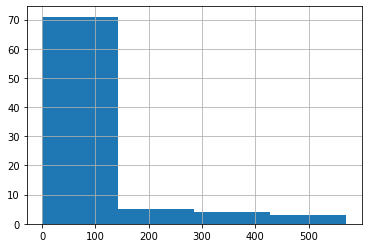

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
cafe_venues['total likes'].hist(bins=4)
plt.show()

In [35]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=50:
        return 'below avg'
    if s['total likes']<=100:
        return 'avg'
    if s['total likes']>100:
        return 'great'

cafe_venues['total likes_cat']=cafe_venues.apply(conditions, axis=1)

In [36]:
cafe_venues

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat
0,Slave Island,6.926520,79.850200,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop,22,poor
1,Slave Island,6.926520,79.850200,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop,38,below avg
2,Slave Island,6.926520,79.850200,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop,11,poor
3,Slave Island,6.926520,79.850200,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133,great
4,Slave Island,6.926520,79.850200,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop,19,poor
5,Slave Island,6.926520,79.850200,5155636fe4b08e31444f9e39,Cafe Seventy Seven,6.920389,79.853801,Coffee Shop,5,poor
6,Slave Island,6.926520,79.850200,4de0e9d11f6ece647385c007,The Verandah,6.920024,79.845865,Coffee Shop,14,poor
7,Union Place,6.918760,79.861130,4c0771cb3cbed13a7af40bc0,Coco Veranda,6.916424,79.868338,Coffee Shop,571,great
8,Union Place,6.918760,79.861130,50cc7812e4b05e0e4e80e1e9,Odel Boulevard,6.916773,79.865148,Coffee Shop,14,poor
9,Union Place,6.918760,79.861130,590d92a2cad1b67f0cbf302e,Life Food,6.916240,79.853326,Coffee Shop,8,poor


In [37]:
# one hot encoding
cafe_onehot = pd.get_dummies(cafe_venues[['VenueCategory', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cafe_onehot['Neighborhood'] = cafe_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cafe_onehot.columns[-1]] + list(cafe_onehot.columns[:-1])
cafe_onehot = cafe_onehot[fixed_columns]

print(cafe_onehot.shape)
cafe_onehot.head()

(83, 6)


,Neighborhood,Coffee Shop,avg,below avg,great,poor
0,Slave Island,1,0,0,0,1
1,Slave Island,1,0,1,0,0
2,Slave Island,1,0,0,0,1
3,Slave Island,1,0,0,1,0
4,Slave Island,1,0,0,0,1


In [38]:
cafe_cluster_df = cafe_onehot.drop('Neighborhood', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cafe_cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 1, 0, 0, 0, 1, 0, 0])

In [39]:
cafe_venues['label'] = kmeans.labels_
cafe_venues.head()

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
0,Slave Island,6.92652,79.8502,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop,22,poor,0
1,Slave Island,6.92652,79.8502,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop,38,below avg,2
2,Slave Island,6.92652,79.8502,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop,11,poor,0
3,Slave Island,6.92652,79.8502,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133,great,1
4,Slave Island,6.92652,79.8502,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop,19,poor,0


In [46]:
cafe_venues

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
0,Slave Island,6.926520,79.850200,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop,22,poor,0
1,Slave Island,6.926520,79.850200,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop,38,below avg,2
2,Slave Island,6.926520,79.850200,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop,11,poor,0
3,Slave Island,6.926520,79.850200,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133,great,1
4,Slave Island,6.926520,79.850200,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop,19,poor,0
5,Slave Island,6.926520,79.850200,5155636fe4b08e31444f9e39,Cafe Seventy Seven,6.920389,79.853801,Coffee Shop,5,poor,0
6,Slave Island,6.926520,79.850200,4de0e9d11f6ece647385c007,The Verandah,6.920024,79.845865,Coffee Shop,14,poor,0
7,Union Place,6.918760,79.861130,4c0771cb3cbed13a7af40bc0,Coco Veranda,6.916424,79.868338,Coffee Shop,571,great,1
8,Union Place,6.918760,79.861130,50cc7812e4b05e0e4e80e1e9,Odel Boulevard,6.916773,79.865148,Coffee Shop,14,poor,0
9,Union Place,6.918760,79.861130,590d92a2cad1b67f0cbf302e,Life Food,6.916240,79.853326,Coffee Shop,8,poor,0


# Visualizing clusters on map 

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cafe_venues['VenueLatitude'], cafe_venues['VenueLongitude'], cafe_venues['VenueName'], cafe_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Cluster 1</h2>
<br>
Characteristics -Poor quality food


In [41]:
cafe_venues.loc[cafe_venues['label'] == 0]

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
0,Slave Island,6.926520,79.850200,4d8a1106d85f37044a2ff5db,The Dining Room,6.929095,79.849568,Coffee Shop,22,poor,0
2,Slave Island,6.926520,79.850200,51dcff7e498e94b774bb1a0e,"Pebbles cafe, Taj Samudra",6.923323,79.846273,Coffee Shop,11,poor,0
4,Slave Island,6.926520,79.850200,4c8b43d575ba9c749e81575c,Goodies,6.928913,79.849598,Coffee Shop,19,poor,0
5,Slave Island,6.926520,79.850200,5155636fe4b08e31444f9e39,Cafe Seventy Seven,6.920389,79.853801,Coffee Shop,5,poor,0
6,Slave Island,6.926520,79.850200,4de0e9d11f6ece647385c007,The Verandah,6.920024,79.845865,Coffee Shop,14,poor,0
8,Union Place,6.918760,79.861130,50cc7812e4b05e0e4e80e1e9,Odel Boulevard,6.916773,79.865148,Coffee Shop,14,poor,0
9,Union Place,6.918760,79.861130,590d92a2cad1b67f0cbf302e,Life Food,6.916240,79.853326,Coffee Shop,8,poor,0
11,Union Place,6.918760,79.861130,4e2959f952b1c37d35caca13,M3 Cafe,6.914540,79.857053,Coffee Shop,14,poor,0
13,Union Place,6.918760,79.861130,5155636fe4b08e31444f9e39,Cafe Seventy Seven,6.920389,79.853801,Coffee Shop,5,poor,0
14,Union Place,6.918760,79.861130,5a609723ee628b483065da85,Caramel Pumpkin,6.916296,79.869043,Coffee Shop,13,poor,0


<h2>Cluster 2</h2>
<br>
Characteristics -Good  quality food


In [42]:
cafe_venues.loc[cafe_venues['label'] == 1]

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
3,Slave Island,6.926520,79.850200,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133,great,1
7,Union Place,6.918760,79.861130,4c0771cb3cbed13a7af40bc0,Coco Veranda,6.916424,79.868338,Coffee Shop,571,great,1
19,Kollupitiya,6.912680,79.851350,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,6.917826,79.848547,Coffee Shop,133,great,1
20,Kollupitiya,6.912680,79.851350,4c0b3fd5340720a191f28793,The Commons,6.908486,79.858051,Coffee Shop,286,great,1
26,Bambalapitiya,6.904710,79.855070,4b991f3df964a520ca6235e3,The Gallery Café,6.898672,79.854599,Coffee Shop,269,great,1
27,Bambalapitiya,6.904710,79.855070,4c0b3fd5340720a191f28793,The Commons,6.908486,79.858051,Coffee Shop,286,great,1
29,Bambalapitiya,6.904710,79.855070,4cb9f8f543ec6dcb891aa131,The Barefoot Cafe,6.896644,79.853765,Coffee Shop,199,great,1
36,Havelock Town,6.887580,79.862560,4efaaa3df790731254d52c57,Java Lounge,6.892233,79.867115,Coffee Shop,318,great,1
39,Kirulapana,6.878604,79.873269,4c305b767cc0c9b69b40ed9a,Barista,6.877262,79.873039,Coffee Shop,207,great,1
45,Kirilapone North,6.881350,79.875880,4c305b767cc0c9b69b40ed9a,Barista,6.877262,79.873039,Coffee Shop,207,great,1


<h2>Cluster 3</h2>
<br>
Characteristics - Below average quality food

In [43]:
cafe_venues.loc[cafe_venues['label'] == 2]

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
1,Slave Island,6.92652,79.85020,4b6fa5cdf964a52006f92ce3,Barista,6.932601,79.843855,Coffee Shop,38,below avg,2
10,Union Place,6.91876,79.86113,56716368498ee66e925b8ffa,Black Cat Cafe,6.915373,79.869426,Coffee Shop,31,below avg,2
12,Union Place,6.91876,79.86113,521d962c498e314c4ac39d7a,Laksala Museum Gallery Café,6.910536,79.861873,Coffee Shop,29,below avg,2
37,Havelock Town,6.88758,79.86256,53c7cc97498e210e88986473,Java Lounge,6.882134,79.858934,Coffee Shop,42,below avg,2
51,Wellawatte,6.87924,79.85989,53c7cc97498e210e88986473,Java Lounge,6.882134,79.858934,Coffee Shop,42,below avg,2
53,Wellawatte,6.87924,79.85989,52e79d2211d21513c70f616a,That Cafe in Colombo,6.875635,79.861391,Coffee Shop,30,below avg,2
60,Pamankada,6.87954,79.86937,52e79d2211d21513c70f616a,That Cafe in Colombo,6.875635,79.861391,Coffee Shop,30,below avg,2
65,Cinnamon Gardens,6.90951,79.86775,562e0cc6498e85c97a0b9753,London House of Coffee,6.909475,79.866491,Coffee Shop,31,below avg,2
66,Cinnamon Gardens,6.90951,79.86775,56716368498ee66e925b8ffa,Black Cat Cafe,6.915373,79.869426,Coffee Shop,31,below avg,2
67,Cinnamon Gardens,6.90951,79.86775,4d3e8f813ec9a35dd2525b81,Aviraté Café,6.908334,79.865088,Coffee Shop,36,below avg,2


<h2>Cluster 4</h2>
<br>
Characteristics - Average quality food

In [49]:
cafe_venues.loc[cafe_venues['label'] == 3]

,Neighborhood,Latitude,Longitude,VenueId,VenueName,VenueLatitude,VenueLongitude,VenueCategory,total likes,total likes_cat,label
16,Kollupitiya,6.91268,79.85135,5059f5cee4b0fd1a4976ab00,Coco Veranda,6.917147,79.848890,Coffee Shop,86,avg,3
21,Kollupitiya,6.91268,79.85135,52fe011d11d2ff511eb909e2,Whight & Co,6.905171,79.850088,Coffee Shop,96,avg,3
28,Bambalapitiya,6.90471,79.85507,52fe011d11d2ff511eb909e2,Whight & Co,6.905171,79.850088,Coffee Shop,96,avg,3
35,Bambalapitiya,6.90471,79.85507,4c835d57e63376b0fb47b93d,Barista,6.898225,79.860518,Coffee Shop,77,avg,3
62,Cinnamon Gardens,6.90951,79.86775,5111f973e4b0b4b884f62da3,Gerard Mendis Chocolatier,6.911246,79.870284,Coffee Shop,56,avg,3
63,Cinnamon Gardens,6.90951,79.86775,5300828811d2e07f25e5c5cc,The Paddington,6.911484,79.868723,Coffee Shop,56,avg,3
